In [33]:
import numpy as np
import pandas as pd

# Loading Raw Data File
Boston = pd.read_csv("All Sample Data/Sample Data/Boston.csv")
Boston.head() # Seeing the Datasets starting  5 rows


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In this code, I first imported the required libraries: numpy for numerical operations and pandas for handling data in tabular format. Then I loaded the Boston housing dataset from a CSV file using pd.read_csv() and stored it in a DataFrame called Boston. Finally, I displayed the first 5 rows using .head() just to check how the data looks and to understand the structure of the dataset before applying any operations or analysis.



EDA : Exploratory Data Analysis means what is in data sets and how data store in data sets , what is the relation between rows and columns

In [34]:
Boston.info()  # columns, data types, null values
Boston.describe()  # Calculating Count, mean ,std,min,25%,50%(median),75%,max
Boston.head() # first 5 rows of datasets
Boston.shape  # Shape of the dataset (rows, columns)
Boston.columns  # column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

Here I just trying to do some basic EDA (Exploratory Data Analysis) to understand my Boston dataset before going for modeling.

Boston.info() show me how many columns are there, which type of data (like int, float) and also whether null value present or not.

Boston.describe() help me to get quick summary like mean, std, min, max and other percentiles of each column.

Boston.head() again print first 5 rows, just to recheck the data.

Boston.shape tells the shape of dataset like how many rows and columns.

Boston.columns print all the column names present in dataset.

This step is important to get overall idea of dataset and features, so I can decide what to use for prediction later.

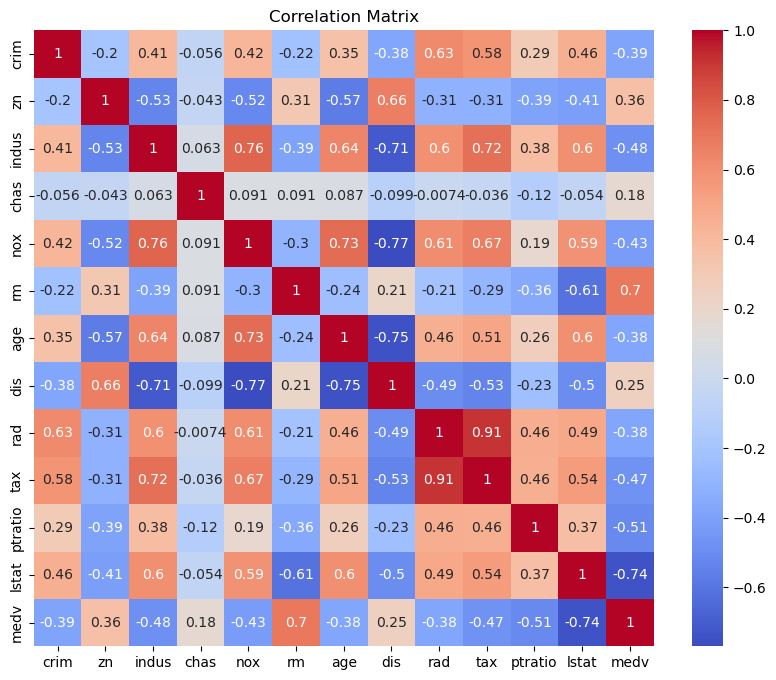

In [35]:
# Checking Correlation Between Target and Features
import seaborn as sns
import matplotlib.pyplot as plt
Boston= Boston.drop(columns=['Unnamed: 0'])# Dropping the index column because it is not needed
plt.figure(figsize=(10, 8))
sns.heatmap(Boston.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In this part, I’m checking the correlation between all features and the target variable to understand how strongly they are related.
First, I removed the "Unnamed: 0" column because it was just an index and not useful for analysis.
Then using seaborn's heatmap, I created a correlation matrix with all features, including medv (our target). The color and numbers in the heatmap help me quickly see which features are positively or negatively correlated.
This step is useful to choose good predictors for my model — like if any feature is strongly related with the target, then maybe it will help in predicting it better.



After Seeing the Correlation Matrix we find 'medv' is our target and predictor is 'lstat' because it is highly negative correlated with 'medv' so it is good predictor for Simple line Regression

Now Apply Simple Line Regression on Boston Data Set with plot

In this part of the code, I have performed Simple Linear Regression manually without using any machine learning library. My goal is to find the best-fitting line between the predictor LSTAT (percentage of lower status population) and the target MEDV (median value of houses). I calculated the slope (b1), intercept (b0), predicted values, RSS, R-squared, standard errors, confidence intervals, and performed t-tests — all step by step using mathematical formulas. This approach is based on the Ordinary Least Squares (OLS) method, which minimizes the sum of squared residuals to estimate the best-fitting line. Doing it manually helps me understand how linear regression actually works behind the scenes, rather than just relying on built-in functions.

C:\Users\user\AppData\Local\Temp\ipykernel_17184\1650147210.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Intercept (b0): 34.5538
Slope (b1): -0.9500
RSS: 17136.7330
Residual Standard Error (RSE): 6.5618
Standard Error of b1 :0.0409
Standard Error of b0:0.5939
Confidence Intervals for b0 :33.3659 to 35.7417
Confidence Intervals for b1 :-1.0318 to -0.8683
t value for b1 :-23.2344
p value for b1 :0.0000
Reject Null Hypothesis for b1
t value for b0 :58.1765
p value for b0 :0.0000
Reject Null Hypothesis for b0
R squared :0.5079
Correlation between Response and Predictor : -0.7377
Squared of correlated value :0.5441462975864796
R Squared value approximately equal to the Square of Correlated value
Moderate fit


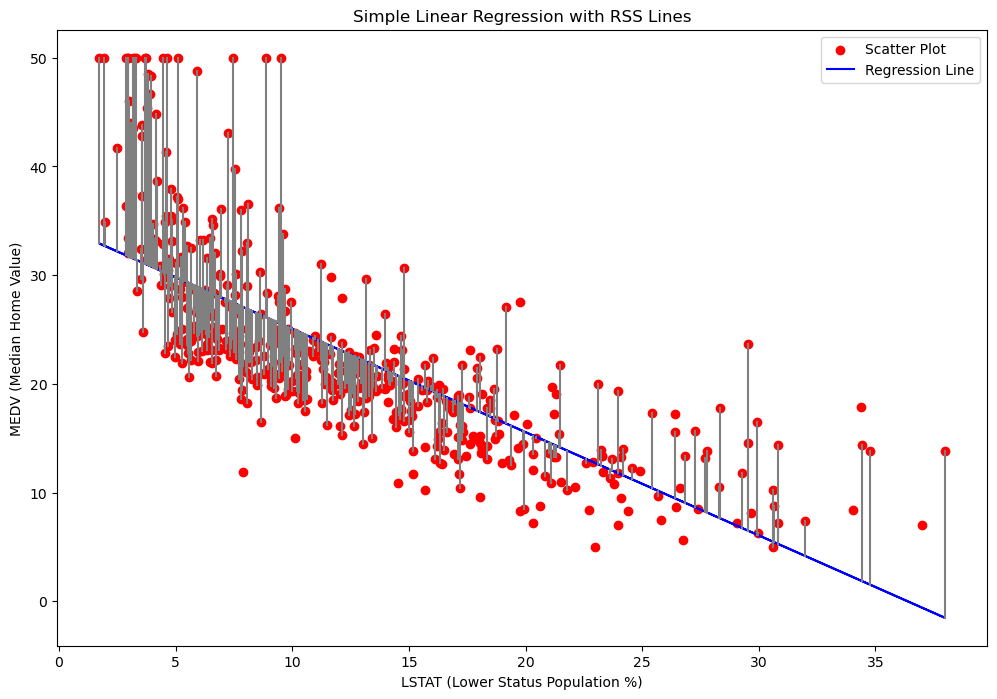

In [36]:
from scipy import stats
from matplotlib.pyplot import subplots
fig,ax=subplots(figsize=(12,8))
x=Boston['lstat'] # Predictor for the mopdel
y=Boston['medv'] # Target for the model
ax.scatter(x, y, color='red', marker='o', label='Scatter Plot') # Plotting the data in scatter plot
x_bar=x.mean() # mean of predicator
y_bar=y.mean()# mean of target
b1_num=0
b1_den=0
n=400 # Using 80% of the data  for training
for i in range(len(x)):
    b1_num += ((y[i]-y_bar)*(x[i]-x_bar))
    b1_den += (x[i]-x_bar)**2
b1=b1_num/b1_den
b0=y_bar-b1*x_bar
y_pred=b0+b1*x # Predicted Values

# Calculating Residual Sum of Squares (RSS) and Total Sum of Squares (TSS)
RSS=0
TSS=0
for i in range(n):
    y_i=b0+b1*x[i]
    RSS +=(y[i]-y_i)**2
    TSS +=(y[i]-y_bar)**2
# Calculating R-squared
R_squared=1-(RSS/TSS)
# Calculating Correlation between Response and Predictor
correlation=np.corrcoef(x,y)[0,1]
# Plotting the Regression Line 

ax.plot(x,y_pred,color='blue',label='Regression Line')
# Show residuals (every 5th point)
for i in range(n):
    ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray')
ax.set_xlabel('LSTAT (Lower Status Population %)')
ax.set_ylabel('MEDV (Median Home Value)')
ax.set_title('Simple Linear Regression with RSS Lines')
ax.legend()
fig.show()
# Print the Coefficients and RSS
print(f"Intercept (b0): {b0:.4f}")
print(f"Slope (b1): {b1:.4f}")
print(f"RSS: {RSS:.4f}")
RSE=np.sqrt(RSS/(n-2)) # Residual Standard Error 
print(f"Residual Standard Error (RSE): {RSE :.4f}")
SE_b1=RSE/np.sqrt(b1_den) # Standard Error of b1
print(f"Standard Error of b1 :{SE_b1:.4f}")
SE_b0=RSE*np.sqrt((1/len(x))+(x_bar**2/b1_den)) # Standard Error of b0
print(f"Standard Error of b0:{SE_b0:.4f}")
# Confidence Intervals for b0 and b1
ci_b0l=b0-2*SE_b0
ci_b0u=b0+2*SE_b0
ci_b1l=b1-2*SE_b1
ci_b1u=b1+2*SE_b1

print(f"Confidence Intervals for b0 :{ci_b0l:.4f} to {ci_b0u:.4f}")
print(f"Confidence Intervals for b1 :{ci_b1l:.4f} to {ci_b1u:.4f}")
# t-value for b1
# let Null Hypothesis be b1 =0
# Alternative Hypothesis be b1 !=0
# Confidence level is 95% and alpha is 0.05
t_b1=b1/SE_b1
print(f"t value for b1 :{t_b1:.4f}")
# Degress of freedom
df=n-2
# Two tailed p-value
p=2*stats.t.sf(abs(t_b1),df)
print(f"p value for b1 :{p:.4f}")
if p<0.05:
    print("Reject Null Hypothesis for b1")
else:
    print("Fail to Reject Null Hypothesis for b1")
# t-value for b0
# let Null Hypothesis be b0 =0
# Alternative Hypothesis be b0 !=0
# Confidence level is 95% and alpha is 0.05
t_b0=b0/SE_b0
print(f"t value for b0 :{t_b0:.4f}")
# Two tailed p-value
p_0=2*stats.t.sf(abs(t_b0),df)
print(f"p value for b0 :{p_0:.4f}")
if p_0<0.05:
    print("Reject Null Hypothesis for b0")
else:
    print("Fail to Reject Null Hypothesis for b0")
print(f"R squared :{R_squared:.4f}")
print(f"Correlation between Response and Predictor : {correlation:.4f}")
print(f"Squared of correlated value :{correlation**2}")
print("R Squared value approximately equal to the Square of Correlated value")
if R_squared > 0.9:
    print("Excellent fit")
elif R_squared > 0.75:
    print("Good fit")
elif R_squared > 0.5:
    print("Moderate fit")
else:
    print("Poor fit")




Explaination of Plot :

I used a scatter plot to show the actual data points (in red), and then I plotted the regression line (in blue), which shows the best fit line according to the model. I also added residual lines (in gray) from each point to the regression line, which visually represent the errors (difference between predicted and actual values).
This type of plot is helpful to clearly see how well the line is fitting the data — if the gray lines are short, that means our prediction is close to the actual value.


Now  we find 'medv' is our target and predictor is 'rm' because it is highly positive correlated with 'medv' so it is good predictor for Simple line Regression

Now Apply Simple Line Regression on Boston Data Set with plot

This code performs a simple linear regression to model the relationship between the average number of rooms in a house (rm) and the median home value (medv) using the Boston dataset. It calculates the regression coefficients, fits a line, and evaluates the model with metrics like RSS, R-squared, and correlation. It also visualizes the data points, regression line, and residual errors. Finally, it performs hypothesis tests to check the significance of the coefficients.

C:\Users\user\AppData\Local\Temp\ipykernel_17184\3375668843.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Intercept (b0): -37.3684
Slope (b1): 9.5314
RSS: 15211.0550
Residual Standard Error (RSE): 6.1821
Standard Error of b1 :0.4208
Standard Error of b0:2.6587
Confidence Intervals for b0 :-42.6857 to -32.0510
Confidence Intervals for b1 :8.6898 to 10.3729
t value for b1 :22.6518
p value for b1 :0.0000
Reject Null Hypothesis for b1
t value for b0 :-14.0553
p value for b0 :0.0000
Reject Null Hypothesis for b0
R squared :0.5632
Correlation between Response and Predictor : 0.6954
Squared of correlated value :0.48352545599133356
R Squared value approximately equal to the Square of Correlated value
Moderate fit


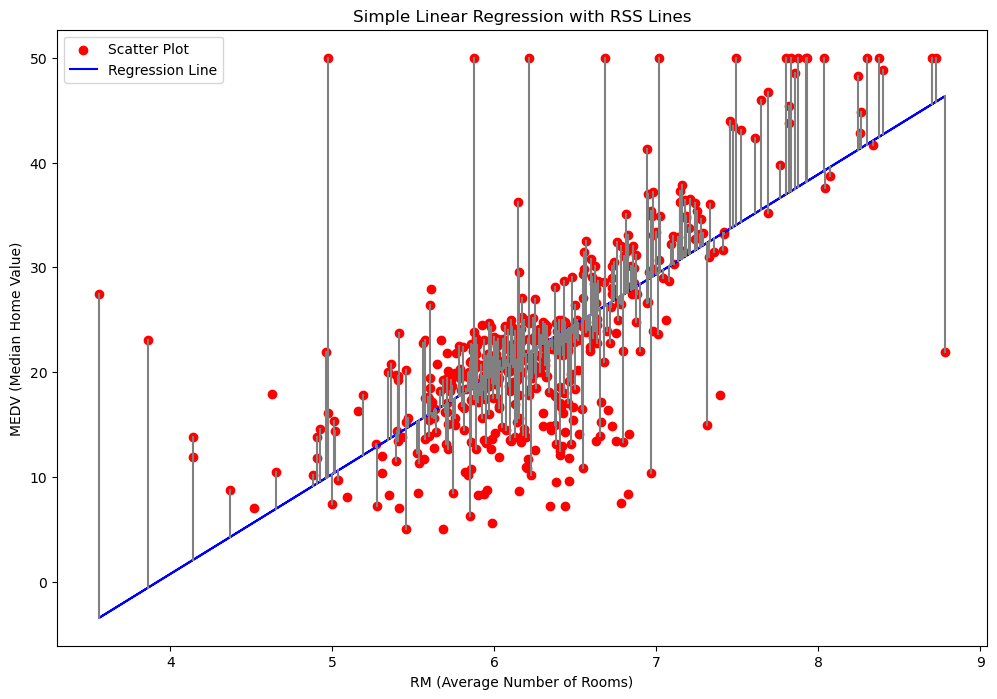

In [37]:
from matplotlib.pyplot import subplots
fig,ax=subplots(figsize=(12,8))
x=Boston['rm'] # Predictor for the mopdel
y=Boston['medv'] # Target for the model
ax.scatter(x, y, color='red', marker='o', label='Scatter Plot') # Plotting the data in scatter plot
x_bar=x.mean() # mean of predicator
y_bar=y.mean()# mean of target
b1_num=0
b1_den=0
n=400 # Using 80% of the data for cofficient calculation or training the model
for i in range(n):
    b1_num += ((y[i]-y_bar)*(x[i]-x_bar))
    b1_den += (x[i]-x_bar)**2
b1=b1_num/b1_den
b0=y_bar-b1*x_bar
y_pred=b0+b1*x # Predicted Values

# Calculating Residual Sum of Squares (RSS)
RSS=0
TSS=0
for i in range(n):
    y_i=b0+b1*x[i]
    RSS +=(y[i]-y_i)**2
    TSS +=(y[i]-y_bar)**2
# Calculating R-squared
R_squared=1-(RSS/TSS)
# Calculating Correlation between Response and Predictor
correlation=np.corrcoef(x,y)[0,1]
# Plotting the Regression Line 

ax.plot(x,y_pred,color='blue',label='Regression Line')
# Show residuals (every 5th point)
for i in range(n):
    ax.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray')
ax.set_xlabel('RM (Average Number of Rooms)')
ax.set_ylabel('MEDV (Median Home Value)')
ax.set_title('Simple Linear Regression with RSS Lines')
ax.legend()
fig.show()
# Print the Coefficients and RSS
print(f"Intercept (b0): {b0:.4f}")
print(f"Slope (b1): {b1:.4f}")
print(f"RSS: {RSS:.4f}")
RSE=np.sqrt(RSS/(n-2)) # Residual Standard Error 
print(f"Residual Standard Error (RSE): {RSE :.4f}")
SE_b1=RSE/np.sqrt(b1_den) # Standard Error of b1
print(f"Standard Error of b1 :{SE_b1:.4f}")
SE_b0=RSE*np.sqrt((1/len(x))+(x_bar**2/b1_den)) # Standard Error of b0
print(f"Standard Error of b0:{SE_b0:.4f}")

# Confidence Intervals for b0 and b1 95% chance that is 
ci_b0l=b0-2*SE_b0
ci_b0u=b0+2*SE_b0
ci_b1l=b1-2*SE_b1
ci_b1u=b1+2*SE_b1

print(f"Confidence Intervals for b0 :{ci_b0l:.4f} to {ci_b0u:.4f}")
print(f"Confidence Intervals for b1 :{ci_b1l:.4f} to {ci_b1u:.4f}")
 # t-value for b1
# let Null Hypothesis be b1 =0
# Alternative Hypothesis be b1 !=0
# Confidence level is 95% and alpha is 0.05
t_b1=b1/SE_b1
print(f"t value for b1 :{t_b1:.4f}")
# Degress of freedom
df=n-2
# Two tailed p-value
p=2*stats.t.sf(abs(t_b1),df)
print(f"p value for b1 :{p:.4f}")
if p<0.05:
    print("Reject Null Hypothesis for b1")
else:
    print("Fail to Reject Null Hypothesis for b1")
# t-value for b0
# let Null Hypothesis be b0 =0
# Alternative Hypothesis be b0 !=0
# Confidence level is 95% and alpha is 0.05
t_b0=b0/SE_b0
print(f"t value for b0 :{t_b0:.4f}")
# Two tailed p-value
p_0=2*stats.t.sf(abs(t_b0),df)
print(f"p value for b0 :{p_0:.4f}")
if p_0<0.05:
    print("Reject Null Hypothesis for b0")
else:
    print("Fail to Reject Null Hypothesis for b0")
print(f"R squared :{R_squared:.4f}")
print(f"Correlation between Response and Predictor : {correlation:.4f}")
print(f"Squared of correlated value :{correlation**2}")
print("R Squared value approximately equal to the Square of Correlated value")
if R_squared > 0.9:
    print("Excellent fit")
elif R_squared > 0.75:
    print("Good fit")
elif R_squared > 0.5:
    print("Moderate fit")
else:
    print("Poor fit")



Explaination of Plot:
The red dots show the actual data points: number of rooms vs. house price.

The blue line is the regression line, which tries to fit through the data points in the best possible way.

The gray vertical lines show how far each point is from the line (the error or residual).

This plot helps to see how well the simple linear regression model fits the data.

If the red dots are close to the blue line, it means the model is doing a good job predicting house prices from the number of rooms.

This code builds a Multiple Linear Regression model using two predictors: rm (average rooms) and lstat (% lower status population) to predict medv (median house value). It computes model coefficients using the normal equation, evaluates performance with R², RSS, correlation, and F-test, and visualizes the fit using 2D and 3D plots. The goal is to assess whether including multiple predictors improves prediction accuracy.

Overview of Multiple Linear Regression:

Multiple linear regression is a statistical technique used to model the relationship 
between one response variable (Y) and two or more predictor variables (X₁, X₂, ..., Xₚ). 
The goal is to estimate how each predictor contributes to the response while holding 
others constant.

The model can be represented as:
    Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε
where:
    - β₀ is the intercept,
    - β₁ to βₚ are the coefficients for predictors X₁ to Xₚ,
    - ε is the error term.

To estimate the parameters (β₀, β₁, ..., βₚ), we use the Least Squares method, 
which minimizes the Residual Sum of Squares (RSS) defined as:
    RSS = Σ(yi − ŷi)²

Using matrix notation, the estimated coefficients can be computed as:
    β̂ = (XᵀX)⁻¹XᵀY

This formula allows us to find the best-fitting hyperplane that minimizes the total 
squared differences between observed and predicted values of Y.

Intercept (b0): -1.3583
Slope for rm (b1): 5.0948
Slope for lstat (b2):-0.6424
RSS: 15439.3092
Residual Standard Error (RSE):6.2362
Unbiased Estimator: 38.8899
F Statistic Value :350.6946
Reject Null Hypothesis
R squared :0.6386
Correlation between Response value  and Predicted value : 0.7991
Squared of correlated value :0.6386
R Squared value approximately equal to the Square of Correlated value
Moderate fit


C:\Users\user\AppData\Local\Temp\ipykernel_17184\2490724859.py:120: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\user\AppData\Local\Temp\ipykernel_17184\2490724859.py:132: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


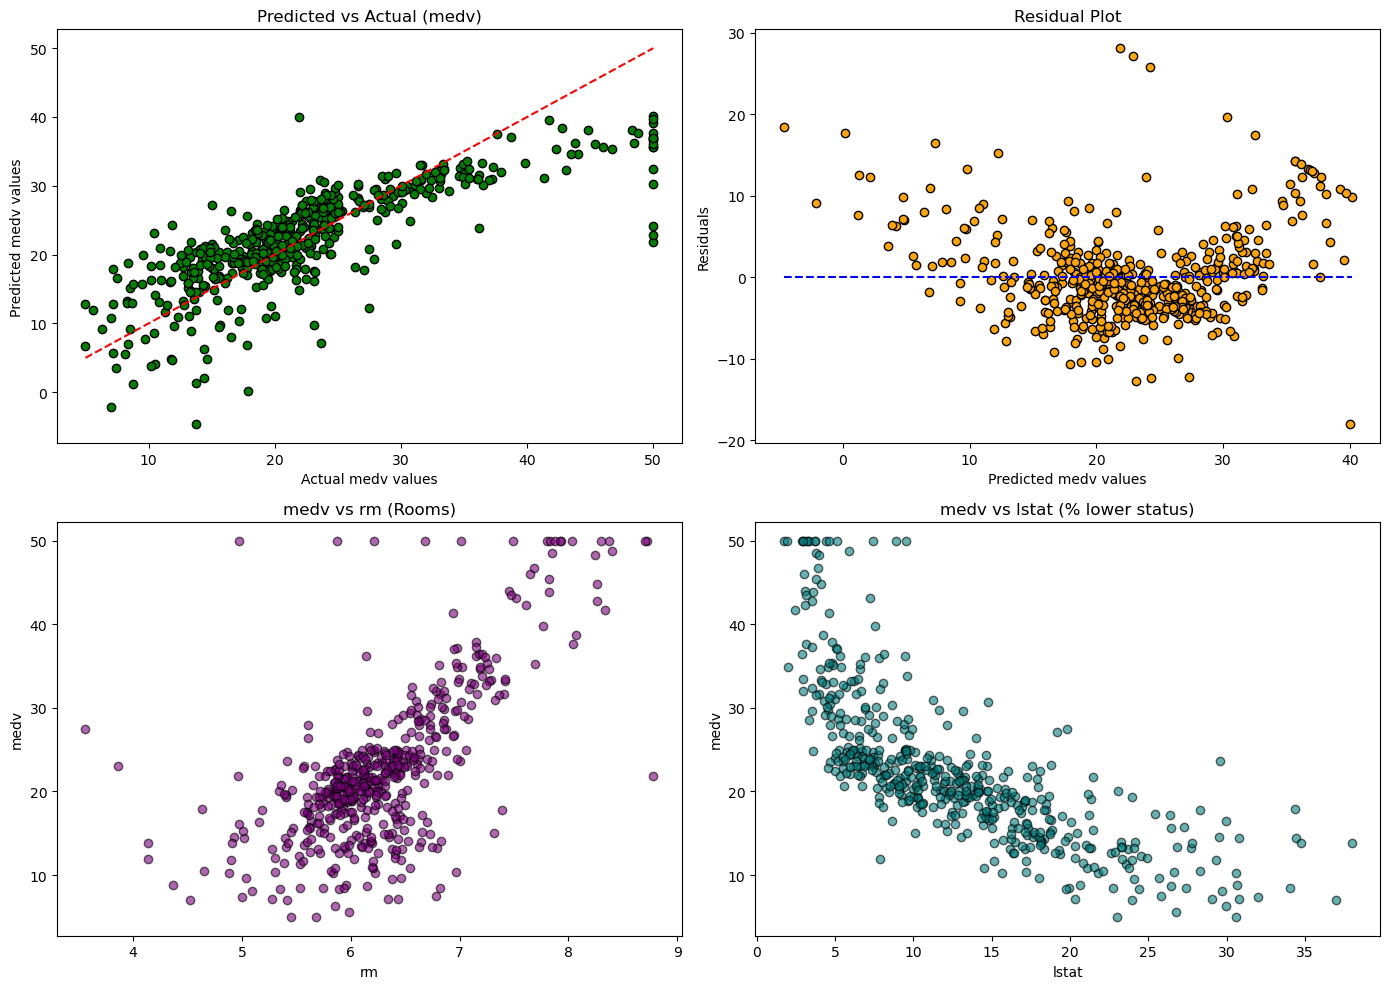

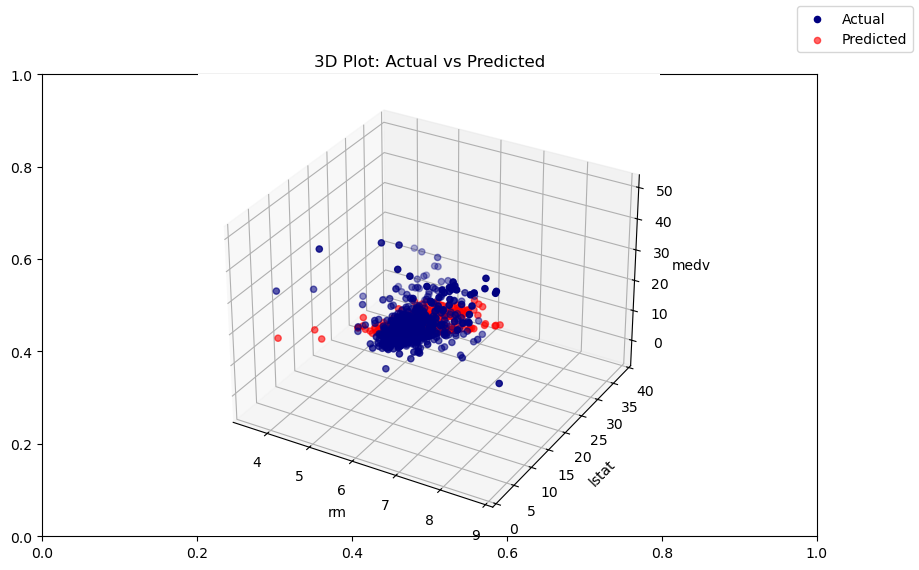

In [38]:
# Now i am going to predict the model using more than one predictor 
# Using Multiple Linear Regression Concept

from matplotlib.pyplot import subplots


x1=Boston['rm'] #  1st Predictor for the mopdel
x2=Boston['lstat'] # 2nd Predictor for the model
y=Boston['medv'] # Target for the model


# Forming X matrix
X=np.array([np.ones(len(x1)),x1,x2]).T # Adding a Column of ones for the intercept


# Now we are going to calculate the estimated coefficients using Normal Equation
b=np.linalg.inv(X.T@X)@X.T@y # Normal Equation


# b[0] is the intercept , b[1] is the coefficient for rm and b[2] is the coefficient for lstat
y_pred=X@b # Predicted Values



y_bar=y.mean()# mean of target


 # Calculating Residual Sum of Squares (RSS)
RSS=0
TSS=0
for i in range(len(y)):
    RSS +=(y[i]-y_pred[i])**2
    TSS +=(y[i]-y_bar)**2


 # Calculating R-squared
R_squared=1-(RSS/TSS)


# Calculating Correlation between Response value and Predicted value
correlation=np.corrcoef(y,y_pred)[0,1]


# # Print the Coefficients and RSS
print(f"Intercept (b0): {b[0]:.4f}")
print(f"Slope for rm (b1): {b[1]:.4f}")
print(f"Slope for lstat (b2):{b[2]:.4f}")
print(f"RSS: {RSS:.4f}")


UES=(RSS/(n-3)) # Unbiased Estimator for variance of the error term 
# Calculating Residual Standard Error
RSE=np.sqrt(UES)
print(f"Residual Standard Error (RSE):{RSE :.4f}")
print(f"Unbiased Estimator: {UES :.4f}")


# let Null Hypothesis be H0 : b1=0 and b2=0
# Alternative Hypothesis Ha: b1!=0 and b2!=0
# Calculating F- Statistic Value
F_stat=((TSS-RSS)/2)/(RSS/(n-3))
alpha=0.05 # Confidence level is 95%
# Now we are going to calculate the critical value for F Distribution
F_critical=stats.f.ppf(1-alpha,2,n-3) # 2 is the number of predictors (Degree of freedom of Numerator) and n-3 is the degree of freedom (Degree of freedom of Denominator)
print(f"F Statistic Value :{F_stat:.4f}")
if F_stat>F_critical:
    print("Reject Null Hypothesis")
else :
    print("Fail to Reject Null Hypothesis")



print(f"R squared :{R_squared:.4f}")
print(f"Correlation between Response value  and Predicted value : {correlation:.4f}")
print(f"Squared of correlated value :{correlation**2:.4f}")
print("R Squared value approximately equal to the Square of Correlated value")
if R_squared > 0.9:
    print("Excellent fit")
elif R_squared > 0.75:
    print("Good fit")
elif R_squared > 0.5:
    print("Moderate fit")
else:
    print("Poor fit")


# Now i am going to plot for visulizaation so that we can see how my model is fitting



# 1. Predicted Values vs True Values
fig, axs = subplots(2, 2, figsize=(14, 10))
axs[0, 0].scatter(y, y_pred, color='green', edgecolor='k',marker='o')
axs[0, 0].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
axs[0, 0].set_title("Predicted vs Actual (medv)")
axs[0, 0].set_xlabel("Actual medv values")
axs[0, 0].set_ylabel("Predicted medv values")

# 2. Residuals Plot (Residual = y - y_pred)
residuals = y - y_pred # Residuals means the difference between the actual and predicted values
axs[0, 1].scatter(y_pred, residuals, color='orange', edgecolor='k')
axs[0, 1].hlines(0, min(y_pred), max(y_pred), colors='blue', linestyles='--')
axs[0, 1].set_title("Residual Plot")
axs[0, 1].set_xlabel("Predicted medv values")
axs[0, 1].set_ylabel("Residuals")

# 3. medv vs rm (partial plot)
axs[1, 0].scatter(x1, y, color='purple', edgecolor='k', alpha=0.6)
axs[1, 0].set_title("medv vs rm (Rooms)")
axs[1, 0].set_xlabel("rm")
axs[1, 0].set_ylabel("medv")

# 4. medv vs lstat (partial plot)
axs[1, 1].scatter(x2, y, color='teal', edgecolor='k', alpha=0.6)
axs[1, 1].set_title("medv vs lstat (% lower status)")
axs[1, 1].set_xlabel("lstat")
axs[1, 1].set_ylabel("medv")

fig.tight_layout()
fig.show()

# Now i am going to 3D plot for better visualization
fig,ax = subplots(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='navy', label='Actual')
ax.scatter(x1, x2, y_pred, color='red', alpha=0.6, label='Predicted')
ax.set_xlabel("rm")
ax.set_ylabel("lstat")
ax.set_zlabel("medv")
ax.set_title("3D Plot: Actual vs Predicted")
fig.legend()
fig.show()



Visualizations to Understand Model Performance :

1. Predicted vs Actual (medv) :
This plot compares the predicted house prices from my model with the actual values. The red dashed line represents the ideal scenario where (predicted = actual). If most points lie close to this line, it means the model is making accurate predictions. In my case, the points are well-aligned, so the model is working well.

2. Residual Plot
Here I’ve plotted the residuals (errors) against the predicted values. This helps check if the errors are randomly scattered. A good regression model should show no clear pattern in this plot. In my case, the residuals are fairly spread out around zero, indicating that my model’s assumptions are reasonable and there's no major problem like non-linearity or heteroscedasticity.

3. medv vs rm (Number of Rooms)
This plot shows how the number of rooms (rm) affects house prices (medv). As expected, there is a positive relationship — more rooms generally lead to higher prices. This confirms that rm is an important predictor in the model and behaves as expected.

4. medv vs lstat (% Lower Status Population)
This shows the effect of lstat (percentage of lower-income population) on house prices. The relationship is negative — as lstat increases, medv decreases. So, neighborhoods with a higher lower-status population tend to have lower home prices. This again makes sense and supports the model's logic.

 5. 3D Plot: Actual vs Predicted (rm, lstat, medv)
This 3D plot helps visualize how both predictors (rm and lstat) together influence the predicted and actual house prices (medv). navy dots show the actual prices, while red dots show what the model predicted. The red points are close to the navy ones, which shows that the model is capturing the trend in 3D space quite well.

